In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
 
html = urlopen('https://blog.csdn.net/zzc15806/') #获取网页
bs = BeautifulSoup(html, 'html.parser') #解析网页
hyperlink = bs.find_all('a')  #获取所有超链接
 
file = open('./blog.txt', 'w')
 
for h in hyperlink:
    hh = h.get('href')
    if hh and '/article/details/' in hh and '#comments' not in hh:  #筛选博客链接
        print(hh)
        file.write(hh)   #写入到“blog.txt”文件中
        file.write('\n')
        
file.close()

https://blog.csdn.net/zzc15806/article/details/105443270
https://blog.csdn.net/zzc15806/article/details/105443270
https://blog.csdn.net/zzc15806/article/details/90510292
https://blog.csdn.net/zzc15806/article/details/90510292
https://blog.csdn.net/zzc15806/article/details/90376023
https://blog.csdn.net/zzc15806/article/details/90376023
https://blog.csdn.net/zzc15806/article/details/89920539
https://blog.csdn.net/zzc15806/article/details/89920539
https://blog.csdn.net/zzc15806/article/details/90140937
https://blog.csdn.net/zzc15806/article/details/90140937
https://blog.csdn.net/zzc15806/article/details/89135069
https://blog.csdn.net/zzc15806/article/details/89135069
https://blog.csdn.net/zzc15806/article/details/89034076
https://blog.csdn.net/zzc15806/article/details/89034076
https://blog.csdn.net/zzc15806/article/details/88555361
https://blog.csdn.net/zzc15806/article/details/88555361
https://blog.csdn.net/zzc15806/article/details/88222125
https://blog.csdn.net/zzc15806/article/details

In [8]:
# coding = UTF-8
# 爬取李东风PDF文档,网址：http://www.math.pku.edu.cn/teachers/lidf/docs/textrick/index.htm
import urllib.request
import re
import os

# open the url and read
def getHtml(url):
    page = urllib.request.urlopen(url)
    html = page.read()
    page.close()
    return html

# compile the regular expressions and find
# all stuff we need
def getUrl(html):
    reg = r'(?:href|HREF)="?((?:http://)?.+?\.pdf)'
    url_re = re.compile(reg)
    url_lst = url_re.findall(html.decode('gb2312'))
    return(url_lst)

def getFile(url):
    file_name = url.split('/')[-1]
    u = urllib.request.urlopen(url)
    f = open(file_name, 'wb')

    block_sz = 8192
    while True:
        buffer = u.read(block_sz)
        if not buffer:
            break

        f.write(buffer)
    f.close()
    print ("Sucessful to download" + " " + file_name)


root_url = 'http://www.math.pku.edu.cn/teachers/lidf/docs/textrick/'

raw_url = 'http://www.math.pku.edu.cn/teachers/lidf/docs/textrick/index.htm'

html = getHtml(raw_url)
url_lst = getUrl(html)

os.mkdir('ldf_download')
os.chdir(os.path.join(os.getcwd(), 'ldf_download'))

for url in url_lst[:]:
    url = root_url + url
    getFile(url)


Sucessful to download tricks.pdf
Sucessful to download symbols-a4.pdf
Sucessful to download AmsLatex.pdf


In [4]:
import urllib.request
import re
import os

# open the url and read
def getHtml(url):
    page = urllib.request.urlopen(url)
    html = page.read()
    page.close()
    return html

html = getHtml(raw_url)
# print(html)
print(html.decode('gb2312'))

<HTML>
<HEAD>
<meta http-equiv="Content-Type" content="text/html; charset=gb2312">
<meta name="keywords" content="Li Dongfeng,LaTeX">
<meta name="description" content="Li Dongfeng's LaTeX tricks, e.g. CJK, PDF">

   <LINK rel="stylesheet" href="http://www.math.pku.edu.cn/teachers/lidf/local.css">
   
   <TITLE>LaTeX排版心得</TITLE>

</HEAD>
<BODY>
 

 

<H1 align="center">LaTeX排版心得</H1>


<P>
本文保存了用LaTeX和PDFLaTeX打印《统计软件教程》一书的心得。
本文排版结果展示了一些特殊技巧，要知道自己如何使用这些技巧要参考本文的LaTeX源程序。
内容包括：
CJK中文的设置与使用；
Emacs编辑器；
PS与PDF文件生成，Type 1 PS字体的使用；带导航的PDF文件；插图；
页眉、页脚的自制；源程序排版；屏幕演示，等等。
</P>

<P>另外还有一些参考文档。</P>

<UL>
    <LI> <A HREF="tricks.pdf">LaTeX排版心得</A> (PDF格式)

    <LI> <A HREF="files.zip">LaTeX排版心得相关的文件</A> 
    
    <LI> <A HREF="symbols-a4.pdf">符号大全</A> (所有常见、不常见符号的文档)

    <LI> <A HREF="AmsLatex.pdf">AMS LaTeX文档</A> (对排版数学公式很有帮助)

</UL>

</BODY>
</HTML>



In [5]:
def getUrl(html):
    reg = r'(?:href|HREF)="?((?:http://)?.+?\.pdf)'
    url_re = re.compile(reg)
    url_lst = url_re.findall(html.decode('gb2312'))
    return(url_lst)

url_lst = getUrl(html)
print(url_lst)

['tricks.pdf', 'symbols-a4.pdf', 'AmsLatex.pdf']


In [6]:
def getFile(url):
    file_name = url.split('/')[-1]
    u = urllib.request.urlopen(url)
    f = open(file_name, 'wb')

    block_sz = 8192
    while True:
        buffer = u.read(block_sz)
        if not buffer:
            break

        f.write(buffer)
    f.close()
    print ("Sucessful to download" + " " + file_name)
    
os.mkdir('ldf_download')
os.chdir(os.path.join(os.getcwd(), 'ldf_download'))

for url in url_lst[:]:
    url = root_url + url
    getFile(url)


Sucessful to download tricks.pdf
Sucessful to download symbols-a4.pdf
Sucessful to download AmsLatex.pdf


In [16]:
for url in url_lst[:]:
    print(url)
    
root_url = 'http://www.math.pku.edu.cn/teachers/lidf/docs/textrick/'

for url in url_lst[:]:
    url = root_url + url
    print(url)

tricks.pdf
symbols-a4.pdf
AmsLatex.pdf
http://www.math.pku.edu.cn/teachers/lidf/docs/textrick/tricks.pdf
http://www.math.pku.edu.cn/teachers/lidf/docs/textrick/symbols-a4.pdf
http://www.math.pku.edu.cn/teachers/lidf/docs/textrick/AmsLatex.pdf


In [18]:
url = 'http://www.math.pku.edu.cn/teachers/lidf/docs/textrick/tricks.pdf'
file_name = url.split('/')[-1]
print(file_name)
f = open(file_name, 'wb')

tricks.pdf


In [19]:
u = urllib.request.urlopen(url)
print(u)

In [22]:
block_sz = 8192
buffer = u.read(block_sz)
# print(buffer)

In [21]:
f.write(buffer)
f.close()

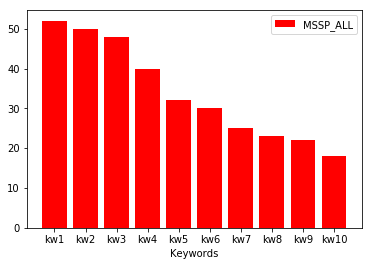

In [11]:
import matplotlib.pyplot as plt
import numpy as np
name_list = ['kw1', 'kw2' , 'kw3' ,
             'kw4', 'kw5' , 'kw6' , 
             'kw7', 'kw8' , 'kw9' ,
             'kw10']
num_list = [52,50,48,40,32,30,25,23,22,18]
x =list(range(len(num_list)))
plt.bar(x, num_list,label='MSSP_ALL',tick_label = name_list,fc = 'r')
plt.xlabel('Keywords')
plt.legend()
plt.show()

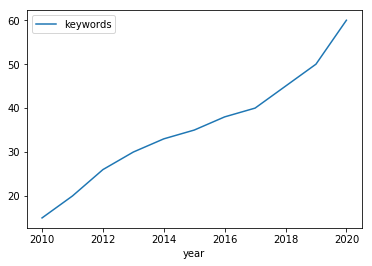

In [10]:
x = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
y = [15,20,26,30,33,35,38,40,45,50,60]
plt.plot(x,y,label='keywords')
plt.xlabel('Year')
plt.legend()
plt.show()

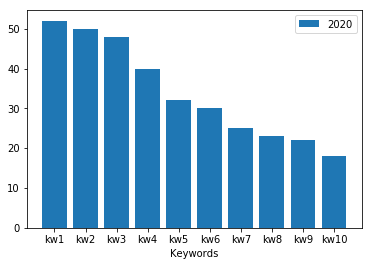

In [12]:
name_list1 = ['kw1', 'kw2' , 'kw3' ,
             'kw4', 'kw5' , 'kw6' , 
             'kw7', 'kw8' , 'kw9' ,
             'kw10']
num_list1 = [52,50,48,40,32,30,25,23,22,18]
x1 =list(range(len(num_list)))
plt.bar(x1, num_list1,label='2020',tick_label = name_list1)
plt.xlabel('Keywords')
plt.legend()
plt.show()

In [16]:
import jieba.analyse
import imageio
import jieba.posseg as pseg
def jieba_cut():
    #西游记停用词
    fr = open('stop.txt', 'r',encoding='utf-8')
    stop_word_list = fr.readlines()
    new_stop_word_list = []
    for stop_word in stop_word_list:
        stop_word = stop_word.replace('\ufeef', '').strip()
        new_stop_word_list.append(stop_word)
#     print(stop_word_list)  #输出停用词
    #输出西游记 词语出现的次数
    fr_xyj=open('outfile.txt','r',encoding='utf-8')
    s=fr_xyj.read()
    words=jieba.cut(s,cut_all=False)
    word_dict={}
    word_list=''
    for word in words:
        if (len(word) > 1 and not word in new_stop_word_list):
            word_list = word_list + ' ' + word
            if (word_dict.get(word)):
                word_dict[word] = word_dict[word] + 1
            else:
                word_dict[word] = 1
    fr.close()
    ##print(word_list)
    #print(word_dict) #输出西游记 词语出现的次数

    #按次数进行排序
    sort_words=sorted(word_dict.items(),key=lambda x:x[1],reverse=True)
    print(sort_words[0:350])#输出前0-100的词

    from wordcloud import WordCloud
    color_mask =imageio.imread("MSSP.png")
    wc = WordCloud(
            background_color="white",  # 背景颜色
            max_words=500,  # 显示最大词数
            font_path="msyh.ttc",  # 使用字体
            min_font_size=5,
            max_font_size=70,
            width=400,
            height=860,

            mask=color_mask) # 图幅宽度
    i=str('new2')
    wc.generate(word_list)
    wc.to_file(str(i)+".png")
jieba_cut()

[('数据', 159), ('学习', 91), ('网络', 77), ('深度', 76), ('of', 66), ('故障诊断', 66), ('特征', 60), ('模型', 57), ('and', 57), ('et', 57), ('al', 57), ('研究', 52), ('方法', 46), ('一种', 45), ('diagnosis', 43), ('训练', 42), ('故障', 41), ('fault', 40), ('机械', 39), ('神经网络', 37), ('for', 37), ('learning', 34), ('提出', 34), ('on', 33), ('卷积', 31), ('CNN', 31), ('领域', 31), ('data', 31), ('输入', 31), ('诊断', 30), ('分类', 30), ('based', 29), ('堆叠', 27), ('network', 27), ('neural', 27), ('deep', 27), ('提取', 27), ('2018', 27), ('DBN', 25), ('the', 25), ('过程', 25), ('传统', 24), ('2020', 23), ('2019', 23), ('编码', 22), ('SAE', 22), ('自动', 22), ('发展', 21), ('RNN', 21), ('算法', 21), ('信号', 21), ('特征提取', 20), ('in', 20), ('with', 20), ('IEEE', 20), ('技术', 19), ('WANG', 19), ('分析', 18), ('能力', 18), ('convolutional', 18), ('参数', 18), ('性能', 17), ('信息', 17), ('networks', 17), ('Systems', 17), ('Journal', 16), ('识别', 16), ('样本', 16), ('LI', 16), ('ZHANG', 15), ('用于', 15), ('2016', 15), ('预测', 14), ('利用', 14), ('生成', 14), ('理论', 14